In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML, Image
%matplotlib inline
rc('animation', html='html5')

# Simple Transverse Waves

<img src="img/simple-transverse-wave.png">

Here we will consider plane waves moving in opposite direction. <br/>
<center>Wave 1: $E1=cos(k x-\omega t)$ &rarr; <\center>
<center>Wave 2: $E2=cos(-k x -\omega t)$ &larr; <\center>

Addition of the two wave:
<center>  
    $E_r=cos(k x - \omega t) + cos(-k x - \omega t)$ <br/>
    $   = 2cos(kx)cos(-\omega t)$
<\center> <br/>
Average square of the total field (detectable power): <br/>
    $\langle E_r^2 \rangle = 2+2cos(2kx)$  Standing Wave 

## Combination of Two Waves Demonstation

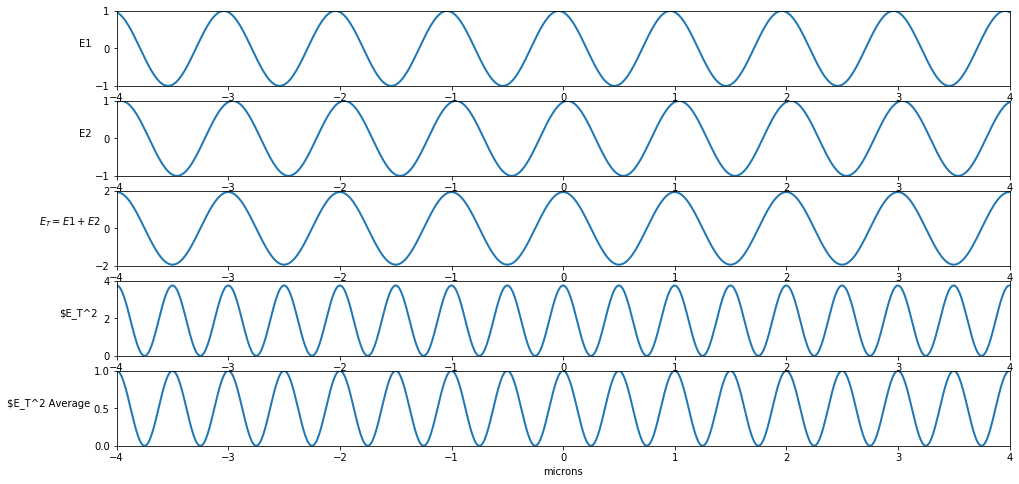

In [2]:
# First set up the figure, the axis, and the plot element we want to animate
fig, axs = plt.subplots(5,figsize=(16,8))
for ax in axs:
    ax.set_xlim(( -4, 4))
    ax.set_ylim((-1, 1))
#set limit for E_sum E_T^2 and E_T^2 average.
axs[2].set_ylim((-2,2))
axs[3].set_ylim((0,4))
axs[4].set_ylim((0,1))
plt.xlabel('microns')
axs[0].set_ylabel('E1',rotation=0,labelpad=10)
axs[1].set_ylabel('E2',rotation=0,labelpad=10)
axs[2].set_ylabel(r'$E_T = E1 + E2$',rotation=0,labelpad=25)
axs[3].set_ylabel(r'$E_T^2',rotation=0,labelpad=25)
axs[4].set_ylabel(r'$E_T^2 Average',rotation=0,labelpad=45)


line1, = axs[0].plot([], [], lw=2)
line2, = axs[1].plot([], [], lw=2)
line3, = axs[2].plot([], [], lw=2)
line4, = axs[3].plot([], [], lw=2)
line5, = axs[4].plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    return (line1, line2, line3, line4, line5,)

# animation function. This is called sequentially
def animate(i):
    x = np.linspace(-4, 4, 1000)
    y1 = np.cos(2 * np.pi * (x - 0.04 * i))
    line1.set_data(x, y1)
    y2 = np.cos(2 * np.pi * (-x - 0.04 * i))
    line2.set_data(x, y2)
    y3 = y1+y2
    line3.set_data(x,y3)
    y4 =y3**2
    line4.set_data(x,y4)
    y5 = (2+2*np.cos(4*np.pi*x))/4 #Normalized Average
    line5.set_data(x,y5)
    return (line1,line2,line3,line4,line5,)

# call the animator. blit=True means only re-draw the parts that 
# have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=25, interval=40, blit=True)

#Can show by running "anim"

anim.save('img/combination-of-two-waves.gif', writer='imagemagick', fps=30)
Image(url='img/combination-of-two-waves.gif')